# Loan Approval ML Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
loan_df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
loan_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Data Research

In [5]:
loan_df.shape

(4269, 13)

In [6]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

<Axes: xlabel=' income_annum'>

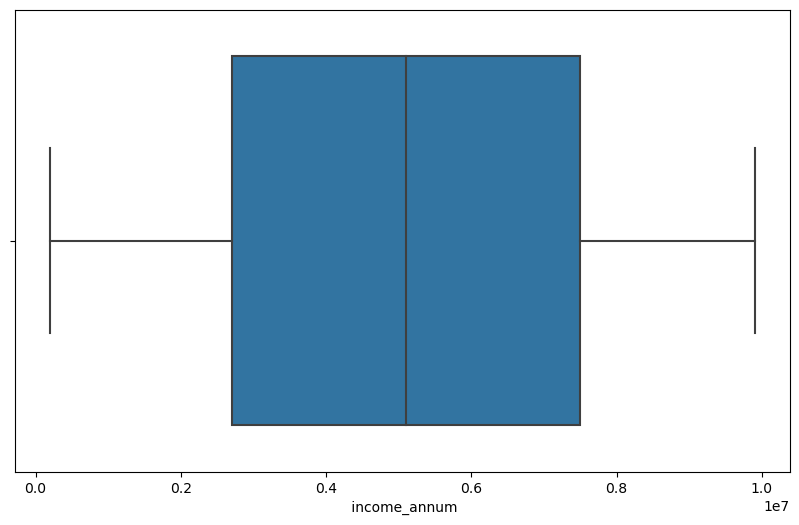

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df[" income_annum"])

<Axes: xlabel=' loan_amount'>

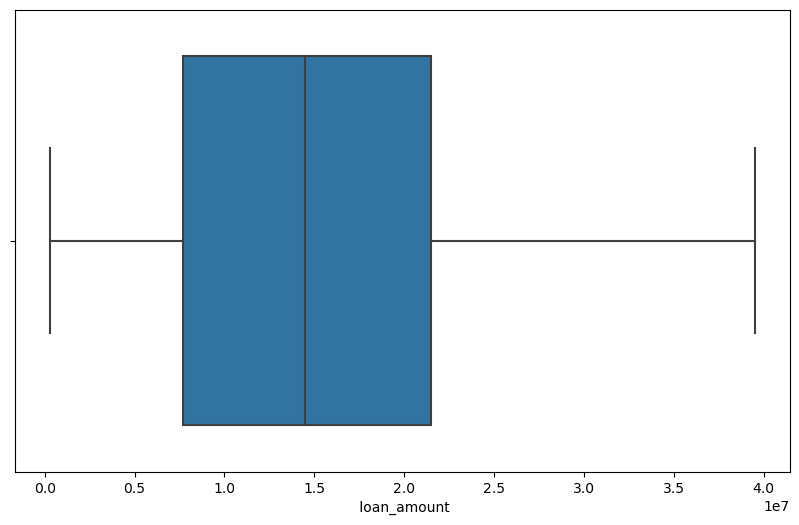

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=loan_df[" loan_amount"])

In [9]:
loan_df[loan_df[" loan_status"]==" Rejected"][' education'].value_counts()

 education
 Not Graduate    808
 Graduate        805
Name: count, dtype: int64

In [10]:
no_accepted=4269-1613
no_accepted

2656

In [11]:
loan_df[loan_df[" loan_status"]==" Approved"].shape

(2656, 13)

#### Approved Data - 2656
#### Rejected Data - 1613

In [12]:
loan_df[loan_df[" loan_amount"]==1000000]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
295,296,1,Not Graduate,Yes,300000,1000000,10,431,400000,500000,900000,100000,Rejected
404,405,3,Graduate,No,500000,1000000,20,501,800000,800000,900000,200000,Rejected
531,532,4,Not Graduate,Yes,300000,1000000,20,655,0,100000,1100000,400000,Approved
1417,1418,4,Not Graduate,No,400000,1000000,10,447,0,300000,900000,300000,Rejected
1454,1455,3,Not Graduate,Yes,300000,1000000,12,469,600000,400000,700000,300000,Rejected
1558,1559,4,Not Graduate,No,300000,1000000,10,819,700000,300000,900000,200000,Approved
1982,1983,2,Not Graduate,No,400000,1000000,6,425,800000,300000,800000,200000,Rejected
2208,2209,1,Graduate,Yes,300000,1000000,14,324,100000,100000,1100000,100000,Rejected
2370,2371,3,Graduate,Yes,300000,1000000,8,641,700000,200000,1100000,200000,Approved
4114,4115,4,Graduate,No,400000,1000000,20,692,500000,400000,1600000,200000,Approved


In [13]:
loan_df.drop("loan_id",inplace=True,axis=1)

In [14]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


###### education Graduate - 1, Not Graduate 0
###### Self Employed ->  yes -1, no - 0
###### loan_status -> approved - 1 , rejected - 0

In [15]:
loan_df[' education'] =loan_df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
loan_df[' self_employed'] =loan_df[' self_employed'].map({' Yes': 1, ' No': 0})
loan_df[' loan_status'] =loan_df[' loan_status'].map({' Approved': 1, ' Rejected': 0})

In [16]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [17]:
feature=loan_df.drop([" loan_status"],axis=1) 

In [18]:
target=loan_df.iloc[:,-1:]

In [19]:
target.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [20]:
feature.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [21]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=42)

In [22]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,4,0,0,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,3,0,1,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,4,1,1,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,3,0,0,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,2,1,1,3300000,6700000,8,845,1300000,4600000,12300000,3200000


In [23]:
loan_df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [24]:
y_train.head()

,loan_status
3404,0
781,1
3002,1
4047,0
3391,1


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

/Users/aritrachakraborty2003/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

model.score(X_train,y_train)

In [27]:
model_lr.score(X_train,y_train)

0.6154618473895582

# Correlation Heatmap

<Axes: >

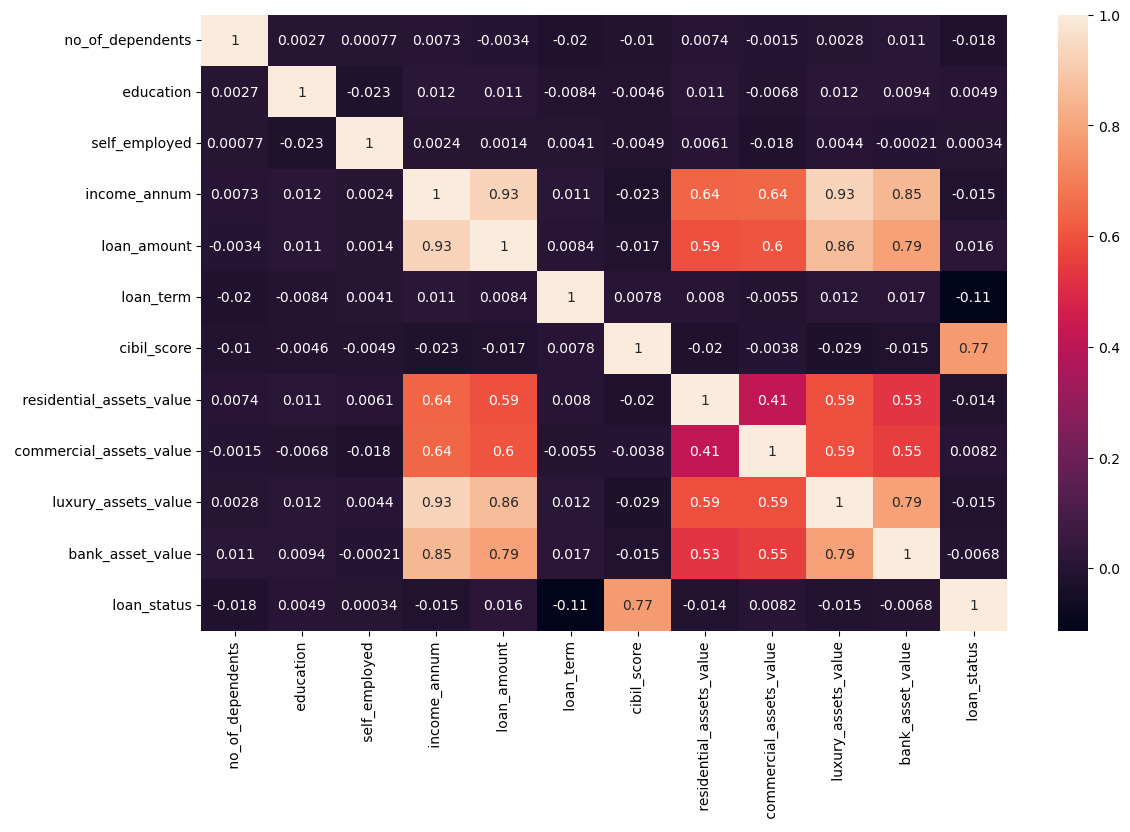

In [28]:
plt.figure(figsize=(13,8))
sns.heatmap(data=loan_df.corr(),annot=True)

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

/Users/aritrachakraborty2003/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [31]:
clf.score(X_test,y_test)*100

97.73614363778297

In [32]:
from joblib import dump

In [33]:
dump(clf,'./../savemodels/loanApproval.joblib')

['./../savemodels/loanApproval.joblib']

In [36]:
y_pred=clf.predict(X_test)

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test,y_pred))

# plot_confusion_matrix function is used to visualize the confusion matrix


[[452  19]
 [ 10 800]]
